# COMP SCI 1015 IAP - Coding Assignment 3 - To-Do List

---

## Specifications

The goal of this assignment is to create a to-do list with GUI using TKInter as shown below 

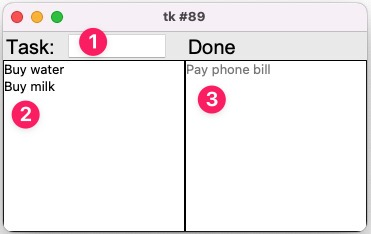

The GUI contains three important components
* (1) text entry where the user can enter the task
* (2) listbox containing tasks.
* (3) listbox containing completed tasks.

Your program must have the following functionality:
* *user input*: the user should be able to input the task in (1). Once press `enter`, the task should appear in (2).
* *interaction with listbox*: the user should be able to **double click** on an item in (2) and mark the task as done. The completed item should appear in (3)

## Tips
* Remember that the separation of data and UI will greatly simplify your code
* We recommend using the events `<<ListboxSelect>>` and `<Double-Button>` for user interaction

## Rubric
<font color='red'>You must implement your program based on the code below. Otherwise you will receive 0 marks!</font>
* Program functionality meets specifications
  * *user input* (30 marks)
  * *interaction with listbox* (50 marks)
* Comments (20 marks)
  * The comments should clearly state the purpose of every *code block* you have.
  * You should NOT be commenting every line at this point in the semester. If you are not commenting for each *code block* you will lose marks.

You earn **10 bonus marks** for making the GUI **persistent**. You should save items in (2) and (3) in a file. When your application starts, it should automatically load and display the items. 

---

## Code

<!-- BEGIN QUESTION -->



In [1]:
import tkinter as tk
import random
import json

# INSERT YOUR CODE BELOW

# Adding a task to the to-do list feature
def add_task():
    task = entry1.get()
    if task != '':
        lb1.insert('end', task)
        data['task'].append(task)
        save_data()
        entry1.delete(0, 'end')

# The capability of moving an item from the to-do list to the finished list
def mark_as_done(event):
    task = lb1.get(lb1.curselection())
    lb1.delete(lb1.curselection())
    lb2.insert('end', task)
    data['task'].remove(task)
    data['done'].append(task)
    save_data()

# A method for importing stored tasks from a JSON file
def load_data():
    try:
        with open('data.json', 'r') as f:
            global data
            data = json.load(f)
            for task in data['task']:
                lb1.insert('end', task)
                for task in data['done']:
                    lb2.insert('end', task)
    except FileNotFoundError:
        pass

# function to create a JSON file with the current tasks
def save_data():
    with open('data.json', 'w') as f:
        json.dump(data, f)
        
# data storing tasks and done tasks
data = {
    'task':[],
    'done':[]
}
load_data()
    
# UI
win = tk.Tk()

tk.Grid.rowconfigure(win, 0, weight=1)
tk.Grid.rowconfigure(win, 1, weight=3)
tk.Grid.columnconfigure(win, 0, weight=1)
tk.Grid.columnconfigure(win, 1, weight=2)
tk.Grid.columnconfigure(win, 2, weight=1)
tk.Grid.columnconfigure(win, 3, weight=2)

lab = tk.Label(text='Task:', font=("Arial", 20))
lab.grid(row=0, column=0, sticky='sw')

entry1 = tk.Entry(width=10)
entry1.grid(row=0, column=1, sticky='sw')
entry1.bind('<Return>', lambda event: add_task())

add_button = tk.Button(text='Add', command=add_task)
add_button.grid(row=0, column=2, sticky='sw')

lb1 = tk.Listbox()
lb1.grid(row=1, column=0, rowspan=3, columnspan=2, sticky='nsew')
lb1.bind('<Double-Button>', mark_as_done)

scroll1 = tk.Scrollbar(win, command=lb1.yview)
scroll1.grid(row=1, column=2, rowspan=3, sticky='nse')

lb1.config(yscrollcommand=scroll1.set)

lab = tk.Label(text='Done', font=("Arial", 20))
lab.grid(row=0, column=2, sticky='sw')

lb2 = tk.Listbox(fg='grey')
lb2.grid(row=1, column=2, rowspan=3, columnspan=2, sticky='nsew')

scroll2 = tk.Scrollbar(win, command=lb2.yview)
scroll2.grid(row=1, column=4, rowspan=3, sticky='nse')

lb2.config(yscrollcommand=scroll2.set)

# if you have completed the load feature, place it before the mainloop
load_data()
win.mainloop()

<!-- END QUESTION -->

